# Azerbaijan Health Insurance Provider Network Analysis

Analysis of healthcare provider networks from 5 insurance companies:
- Pasha Insurance
- A-Group
- Ateshgah
- AIIC
- Meqa Sigorta

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Paths - use absolute paths for papermill compatibility
NOTEBOOK_DIR = os.path.dirname(os.path.abspath('__file__'))
if 'notebooks' in NOTEBOOK_DIR or NOTEBOOK_DIR.endswith('notebooks'):
    ROOT_DIR = os.path.dirname(NOTEBOOK_DIR)
else:
    ROOT_DIR = r'C:\Users\iasamadov\Desktop\health_insurance_analyse'

DATA_DIR = os.path.join(ROOT_DIR, 'data')
CHARTS_DIR = os.path.join(ROOT_DIR, 'charts')
os.makedirs(CHARTS_DIR, exist_ok=True)

# Load data
df = pd.read_csv(os.path.join(DATA_DIR, 'combined.csv'))
print(f'Total records: {len(df)}')
print(f'Companies: {df["source"].nunique()}')
print(f'Provider types: {df["type"].nunique()}')

Total records: 1137
Companies: 5
Provider types: 4


In [2]:
# Summary statistics
print('BY SOURCE:')
print(df['source'].value_counts())
print('\nBY TYPE:')
print(df['type'].value_counts())
print('\nBY REGION:')
print(df['region_category'].value_counts())

BY SOURCE:
source
Pasha Insurance    301
A-Group            237
Ateshgah           225
AIIC               212
Meqa Sigorta       162
Name: count, dtype: int64

BY TYPE:
type
CLINIC      612
PHARMACY    420
DENTAL       73
OPTICS       32
Name: count, dtype: int64

BY REGION:
region_category
Bakı      875
Region    262
Name: count, dtype: int64


In [3]:
# Color schemes
COMPANY_COLORS = {
    'Pasha Insurance': '#E53935',
    'A-Group': '#8E24AA',
    'Ateshgah': '#43A047',
    'AIIC': '#1E88E5',
    'Meqa Sigorta': '#FB8C00'
}
TYPE_COLORS = {
    'CLINIC': '#1E88E5',
    'PHARMACY': '#43A047',
    'DENTAL': '#E53935',
    'OPTICS': '#8E24AA'
}

plt.rcParams.update({'figure.facecolor': 'white', 'axes.facecolor': 'white', 'axes.grid': True, 'grid.alpha': 0.3})

## Chart 1: Network Size by Company

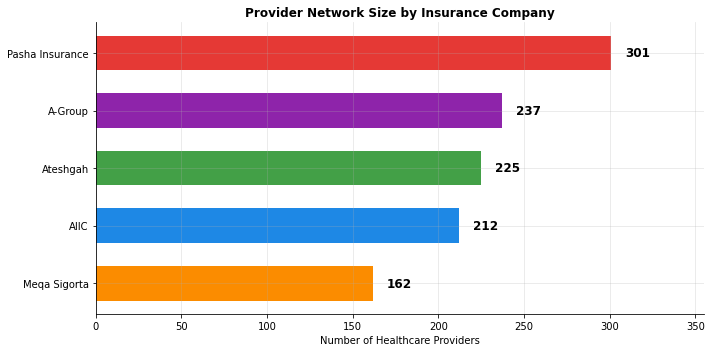

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
source_counts = df['source'].value_counts().sort_values()
colors = [COMPANY_COLORS[s] for s in source_counts.index]
bars = ax.barh(source_counts.index, source_counts.values, color=colors, height=0.6)
for bar in bars:
    ax.text(bar.get_width() + 8, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center', fontsize=12, fontweight='bold')
ax.set_xlabel('Number of Healthcare Providers')
ax.set_title('Provider Network Size by Insurance Company', fontweight='bold')
ax.set_xlim(0, source_counts.max() * 1.18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig(os.path.join(CHARTS_DIR, '01_network_size.png'), dpi=150, facecolor='white')
plt.show()

## Chart 2: Provider Types Distribution

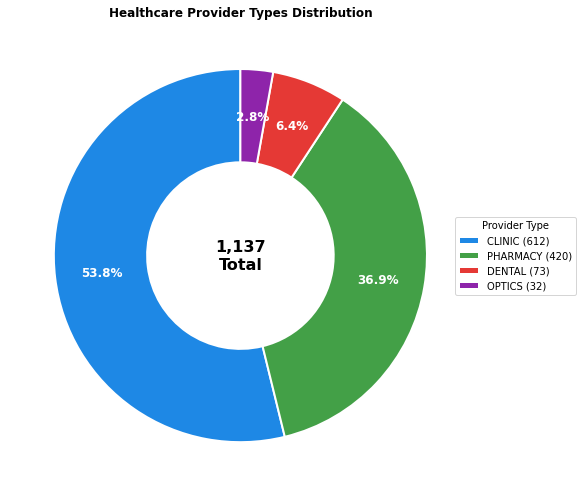

In [5]:
fig, ax = plt.subplots(figsize=(9, 7))
type_counts = df['type'].value_counts()
colors = [TYPE_COLORS[t] for t in type_counts.index]
wedges, texts, autotexts = ax.pie(type_counts.values, colors=colors, autopct='%1.1f%%', pctdistance=0.75, startangle=90,
                                   wedgeprops={'width': 0.5, 'edgecolor': 'white', 'linewidth': 2})
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('white')
ax.text(0, 0, f'{len(df):,}\nTotal', ha='center', va='center', fontsize=16, fontweight='bold')
legend_labels = [f'{t} ({c})' for t, c in zip(type_counts.index, type_counts.values)]
ax.legend(wedges, legend_labels, title='Provider Type', loc='center left', bbox_to_anchor=(0.95, 0.5))
ax.set_title('Healthcare Provider Types Distribution', fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(CHARTS_DIR, '02_provider_types.png'), dpi=150, facecolor='white')
plt.show()

## Chart 3: Geographic Concentration

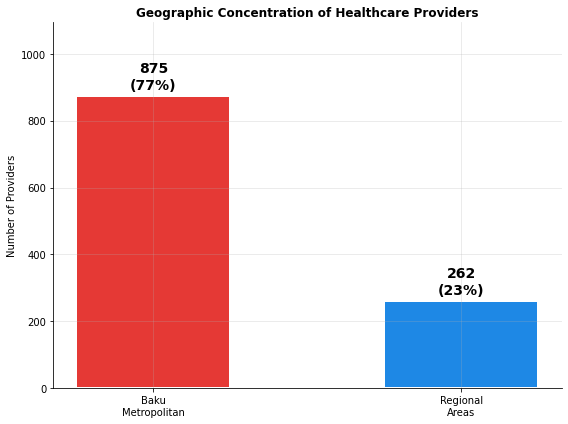

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
baku_count = len(df[df['region_category'] == 'Bakı'])
region_count = len(df[df['region_category'] == 'Region'])
total = baku_count + region_count
categories = ['Baku\nMetropolitan', 'Regional\nAreas']
values = [baku_count, region_count]
percentages = [baku_count/total*100, region_count/total*100]
bars = ax.bar(categories, values, color=['#E53935', '#1E88E5'], width=0.5, edgecolor='white', linewidth=2)
for bar, val, pct in zip(bars, values, percentages):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, f'{val}\n({pct:.0f}%)', ha='center', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Providers')
ax.set_title('Geographic Concentration of Healthcare Providers', fontweight='bold')
ax.set_ylim(0, max(values) * 1.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig(os.path.join(CHARTS_DIR, '03_geographic_concentration.png'), dpi=150, facecolor='white')
plt.show()

## Chart 4: Company Strategy Heatmap

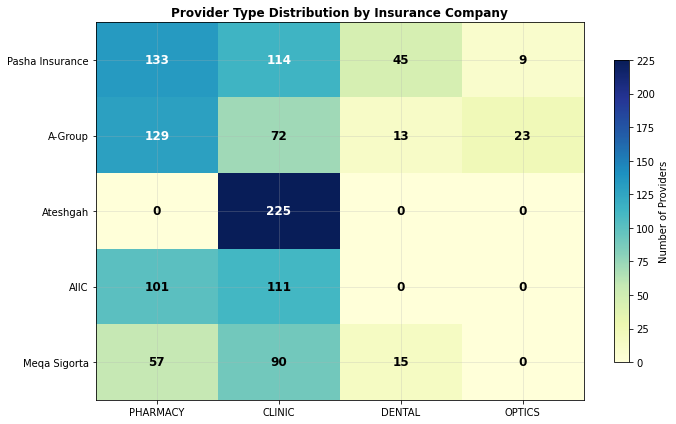

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
pivot = df.groupby(['source', 'type']).size().unstack(fill_value=0)
pivot = pivot.reindex(columns=['PHARMACY', 'CLINIC', 'DENTAL', 'OPTICS'])
pivot = pivot.loc[df['source'].value_counts().index]
im = ax.imshow(pivot.values, cmap='YlGnBu', aspect='auto')
for i in range(len(pivot.index)):
    for j in range(len(pivot.columns)):
        val = pivot.values[i, j]
        color = 'white' if val > pivot.values.max() * 0.5 else 'black'
        ax.text(j, i, f'{val}', ha='center', va='center', fontsize=12, fontweight='bold', color=color)
ax.set_xticks(range(len(pivot.columns)))
ax.set_xticklabels(pivot.columns)
ax.set_yticks(range(len(pivot.index)))
ax.set_yticklabels(pivot.index)
ax.set_title('Provider Type Distribution by Insurance Company', fontweight='bold')
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('Number of Providers')
plt.tight_layout()
plt.savefig(os.path.join(CHARTS_DIR, '04_company_strategy_heatmap.png'), dpi=150, facecolor='white')
plt.show()

## Chart 5: Regional Coverage by Company

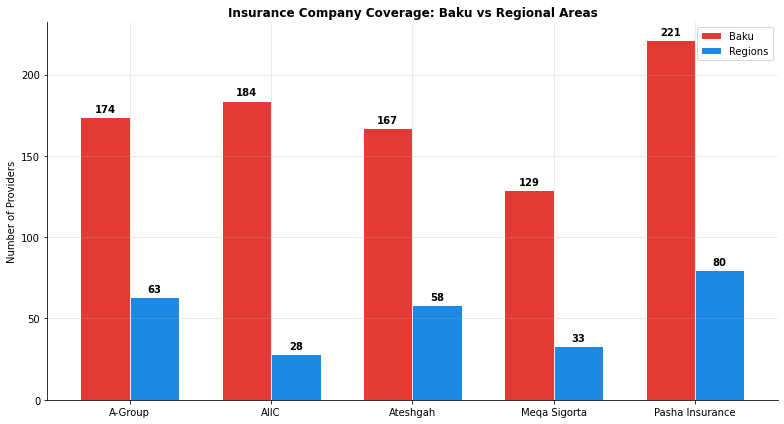

In [8]:
fig, ax = plt.subplots(figsize=(11, 6))
pivot_region = df.groupby(['source', 'region_category']).size().unstack(fill_value=0)
pivot_region = pivot_region.reindex(columns=['Bakı', 'Region'])
companies = pivot_region.index.tolist()
x = np.arange(len(companies))
width = 0.35
bars1 = ax.bar(x - width/2, pivot_region['Bakı'], width, label='Baku', color='#E53935', edgecolor='white')
bars2 = ax.bar(x + width/2, pivot_region['Region'], width, label='Regions', color='#1E88E5', edgecolor='white')
for bars in [bars1, bars2]:
    for bar in bars:
        if bar.get_height() > 0:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3, f'{int(bar.get_height())}', ha='center', fontsize=10, fontweight='bold')
ax.set_ylabel('Number of Providers')
ax.set_title('Insurance Company Coverage: Baku vs Regional Areas', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(companies, fontsize=10)
ax.legend(loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig(os.path.join(CHARTS_DIR, '05_regional_coverage.png'), dpi=150, facecolor='white')
plt.show()

## Chart 6: Top Regional Cities

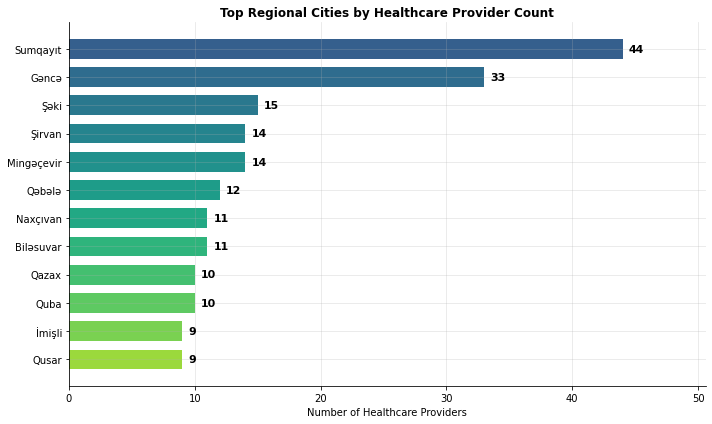

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
city_counts = df[df['region_category'] == 'Region']['city'].value_counts().head(12)
colors = plt.cm.viridis(np.linspace(0.3, 0.85, len(city_counts)))
bars = ax.barh(range(len(city_counts)), city_counts.values, color=colors, height=0.7)
ax.set_yticks(range(len(city_counts)))
ax.set_yticklabels(city_counts.index)
ax.invert_yaxis()
for bar in bars:
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center', fontsize=11, fontweight='bold')
ax.set_xlabel('Number of Healthcare Providers')
ax.set_title('Top Regional Cities by Healthcare Provider Count', fontweight='bold')
ax.set_xlim(0, city_counts.max() * 1.15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig(os.path.join(CHARTS_DIR, '06_top_regional_cities.png'), dpi=150, facecolor='white')
plt.show()

## Chart 7: Specialty Services (Dental & Optics)

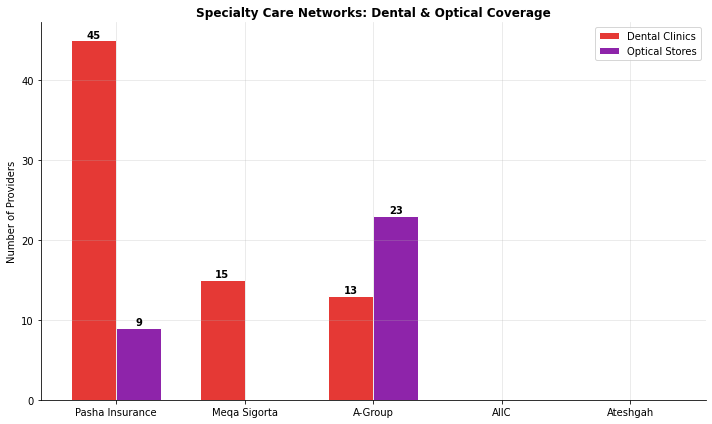

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
specialty_data = []
for source in df['source'].unique():
    source_df = df[df['source'] == source]
    dental = len(source_df[source_df['type'] == 'DENTAL'])
    optics = len(source_df[source_df['type'] == 'OPTICS'])
    specialty_data.append({'source': source, 'Dental': dental, 'Optics': optics})
spec_df = pd.DataFrame(specialty_data).sort_values(by=['Dental', 'Optics'], ascending=False)
x = np.arange(len(spec_df))
width = 0.35
bars1 = ax.bar(x - width/2, spec_df['Dental'], width, label='Dental Clinics', color='#E53935', edgecolor='white')
bars2 = ax.bar(x + width/2, spec_df['Optics'], width, label='Optical Stores', color='#8E24AA', edgecolor='white')
for bars in [bars1, bars2]:
    for bar in bars:
        if bar.get_height() > 0:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, f'{int(bar.get_height())}', ha='center', fontsize=10, fontweight='bold')
ax.set_ylabel('Number of Providers')
ax.set_title('Specialty Care Networks: Dental & Optical Coverage', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(spec_df['source'], fontsize=10)
ax.legend(loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig(os.path.join(CHARTS_DIR, '07_specialty_services.png'), dpi=150, facecolor='white')
plt.show()

## Chart 8: Azerbaijan Geographic Map

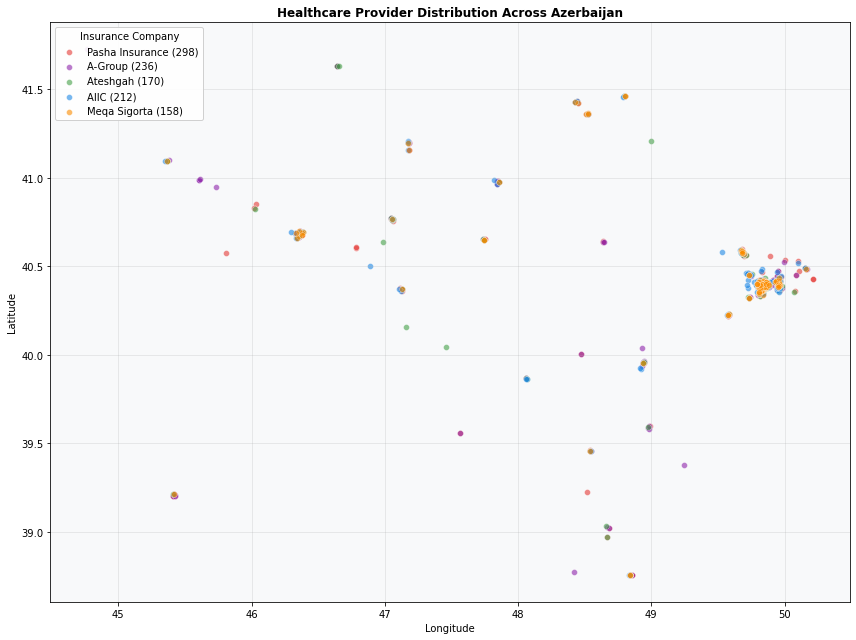

In [11]:
fig, ax = plt.subplots(figsize=(12, 9))
geo_df = df[(df['latitude'].notna()) & (df['longitude'].notna())]
geo_df = geo_df[(geo_df['latitude'] >= 38.5) & (geo_df['latitude'] <= 42) & (geo_df['longitude'] >= 44.5) & (geo_df['longitude'] <= 51)]
for source in ['Pasha Insurance', 'A-Group', 'Ateshgah', 'AIIC', 'Meqa Sigorta']:
    subset = geo_df[geo_df['source'] == source]
    if len(subset) > 0:
        ax.scatter(subset['longitude'], subset['latitude'], c=COMPANY_COLORS[source], label=f'{source} ({len(subset)})', alpha=0.6, s=35, edgecolors='white', linewidth=0.5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Healthcare Provider Distribution Across Azerbaijan', fontweight='bold')
ax.legend(title='Insurance Company', loc='upper left', framealpha=0.9)
ax.set_facecolor('#f8f9fa')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(CHARTS_DIR, '08_azerbaijan_map.png'), dpi=150, facecolor='white')
plt.show()

## Summary Statistics

In [12]:
print('=' * 50)
print('SUMMARY')
print('=' * 50)
print(f'Total providers: {len(df):,}')
print(f'Pharmacies: {len(df[df["type"]=="PHARMACY"]):,}')
print(f'Clinics: {len(df[df["type"]=="CLINIC"]):,}')
print(f'Dental: {len(df[df["type"]=="DENTAL"]):,}')
print(f'Optics: {len(df[df["type"]=="OPTICS"]):,}')
print(f'\nBaku: {len(df[df["region_category"]=="Bakı"]):,} ({len(df[df["region_category"]=="Bakı"])/len(df)*100:.0f}%)')
print(f'Regions: {len(df[df["region_category"]=="Region"]):,} ({len(df[df["region_category"]=="Region"])/len(df)*100:.0f}%)')
print('\nLargest network:', df['source'].value_counts().idxmax())
print('Most pharmacies:', df[df['type']=='PHARMACY']['source'].value_counts().idxmax())
print('Most clinics:', df[df['type']=='CLINIC']['source'].value_counts().idxmax())

SUMMARY
Total providers: 1,137
Pharmacies: 420
Clinics: 612
Dental: 73
Optics: 32

Baku: 875 (77%)
Regions: 262 (23%)

Largest network: Pasha Insurance
Most pharmacies: Pasha Insurance
Most clinics: Ateshgah
